In [5]:
# import the data
import sinter
import matplotlib.pyplot as plt
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
import os
from scripts.line_fit_plots import *
from scripts.threshold_plot import *


In [6]:
honeycomb_data = dict()
fcc_data = dict()
for file in os.listdir('../data/'):
    os.system(f"sinter combine ../data/{file} > ../data/compress_{file}")
    new_samples = sinter.stats_from_csv_files('../data/compress_'+file)
    if new_samples[0].json_metadata['code'] == 'FloquetColourCode':
        fcc_data[new_samples[0].json_metadata['bias']] = new_samples

    elif new_samples[0].json_metadata['code'] == 'Honeycomb':
        honeycomb_data[new_samples[0].json_metadata['bias']] = new_samples


2
4
8
16
24
32
48
64


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

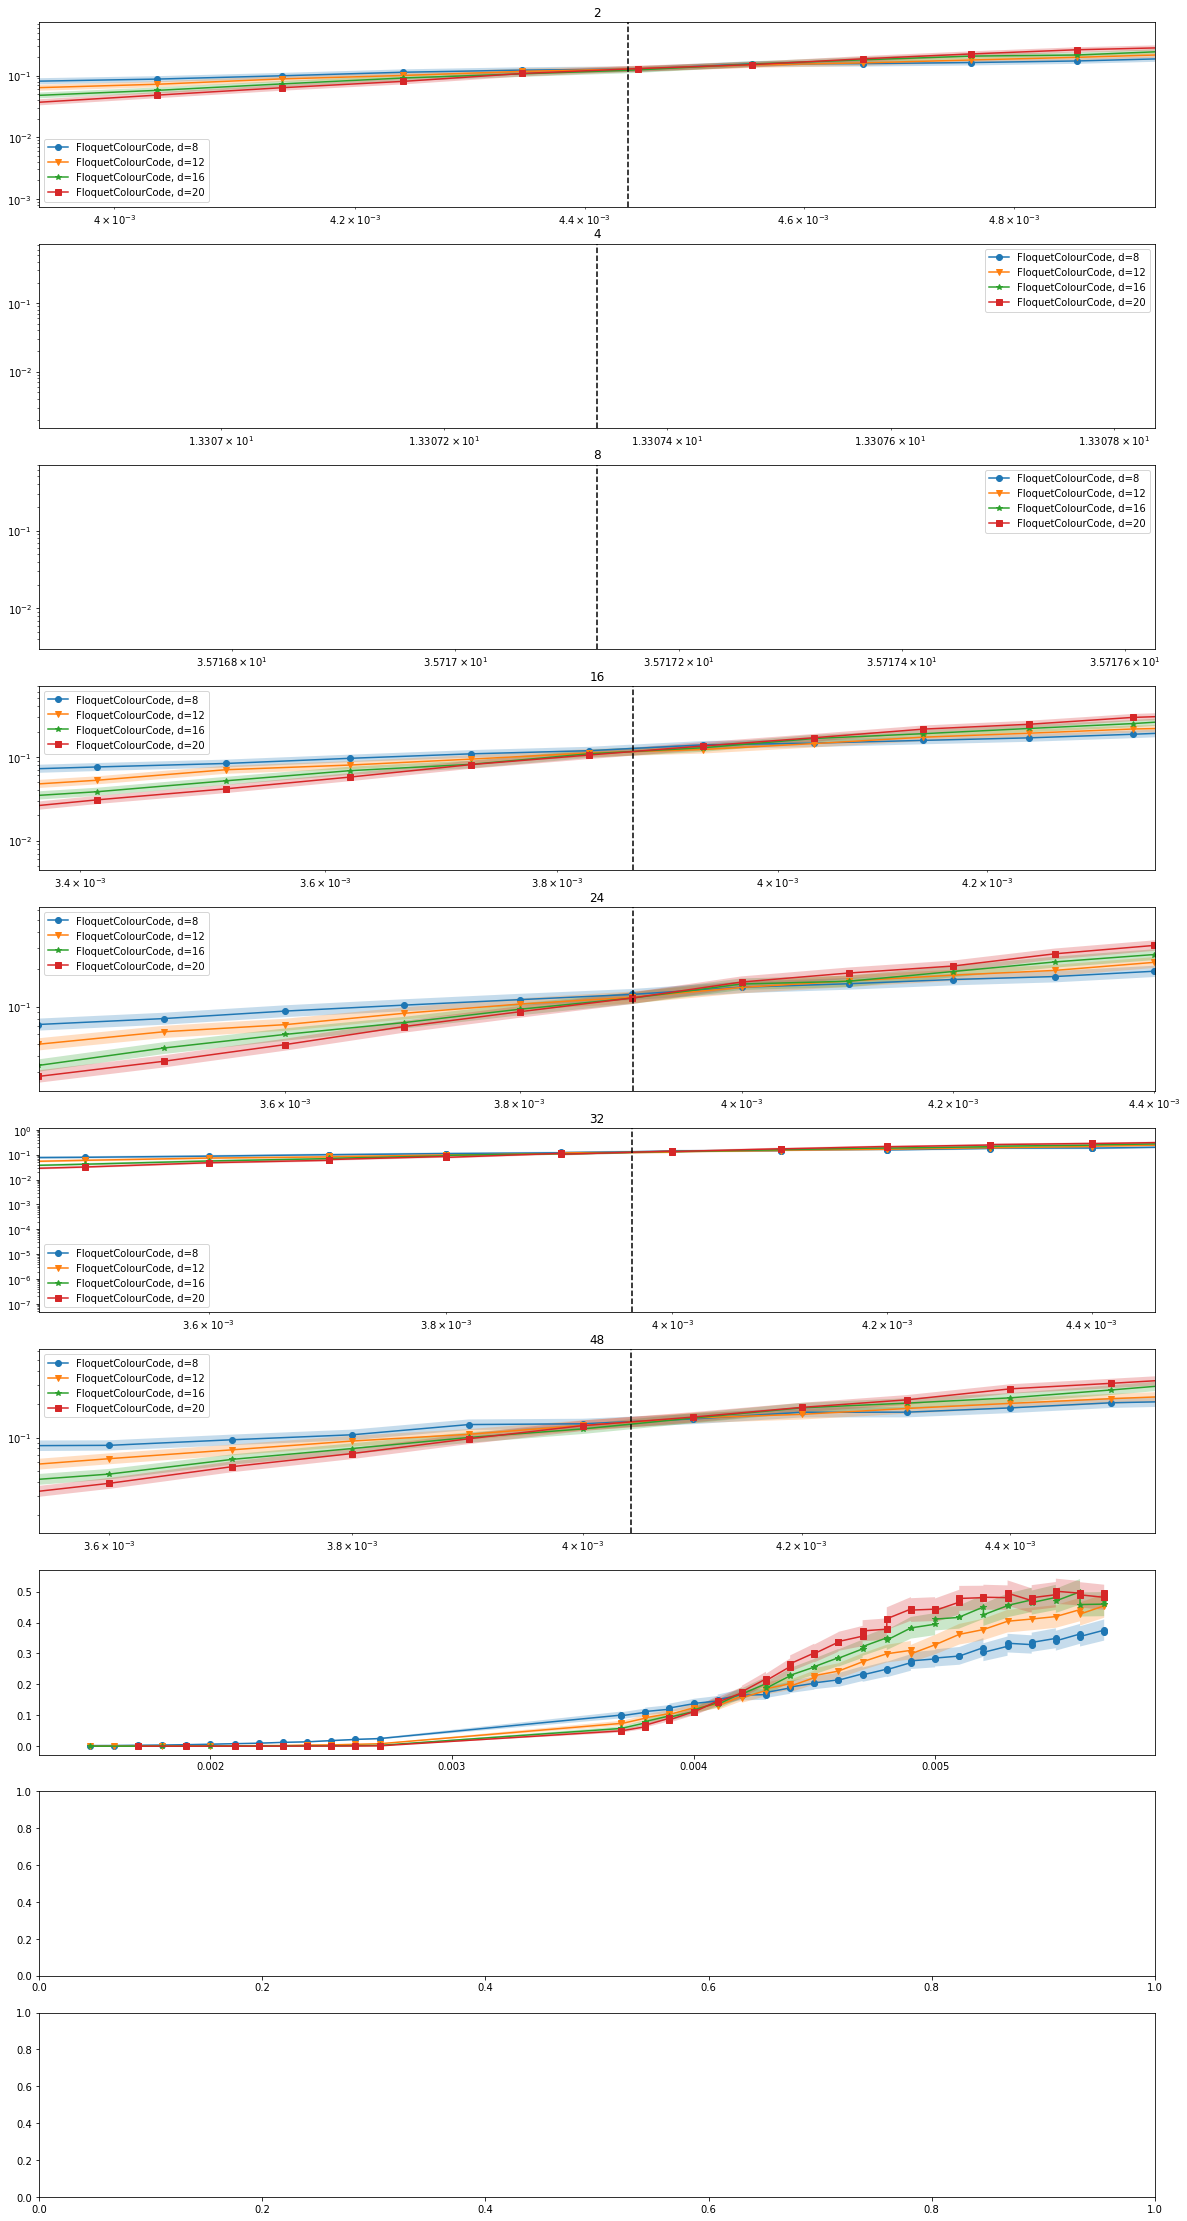

In [9]:
thresholds_fcc = dict()
fig, ax = plt.subplots(len(fcc_data.keys()),1, figsize=(20,40))
#code_constructor = FloquetColourCode
biases = list(fcc_data.keys())
biases.sort()
for index,bias in enumerate(biases):

    sinter.plot_error_rate(
                ax=ax[index],
                stats=fcc_data[bias],
                group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
                x_func=lambda stat: stat.json_metadata['p'])
    print(bias)

#    samples_fcc = sinter.stats_from_csv_files("../data/compress_FloquetColourCode_bias_"+str(bias)+".csv")
#    if bias < 64:l
    thresholds_fcc[bias] = get_one_threshold(fcc_data[bias], 1,0.003,0.005)

    ax[index].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
    ax[index].legend()
    ax[index].loglog()
    ax[index].set_xlim(thresholds_fcc[bias]-0.0005, thresholds_fcc[bias]+0.0005)
    ax[index].set_title(str(bias))


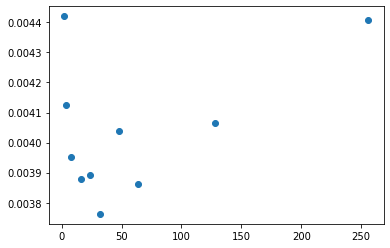

In [19]:
plt.plot(thresholds_fcc.keys(), thresholds_fcc.values(),'o')

In [ ]:
thresholds_hcc = dict()
fig, ax = plt.subplots(len(honeycomb_data.keys()),1, figsize=(20,20))
#code_constructor = FloquetColourCode
for index,bias in enumerate(honeycomb_data.keys()):

    sinter.plot_error_rate(
                ax=ax[index],
                stats=fcc_data[bias],
                group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
                x_func=lambda stat: stat.json_metadata['p'])
    print(bias)

    samples_fcc = sinter.stats_from_csv_files("../data/FloquetColourCode_bias_"+str(bias)+".csv")
#    if bias < 64:
    thresholds_fcc[bias] = get_one_threshold(samples_fcc, 1)

    ax[index].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
    ax[index].legend()
    ax[index].loglog()
    ax[index].set_xlim(thresholds_fcc[bias]-0.001, thresholds_fcc[bias]+0.001)